In [1]:
# Libraries for data manipulation
import pandas as pd
from nptdms import TdmsFile
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for models evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Machine Learning Algorithms
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Other Libraries
import time
from joblib import dump, load


In [2]:
# Function Definitions

def rename(df):
    df = df.rename(columns={
        "/'Untitled'/'Micr1'": 'Micr1',
        "/'Untitled'/'Acc1X'": 'Acc1X',
        "/'Untitled'/'Acc1Y'": 'Acc1Y',
        "/'Untitled'/'Acc1Z'": 'Acc1Z',
        "/'Untitled'/'Acc5X'": 'Acc5X',
        "/'Untitled'/'Acc5Y'": 'Acc5Y',
        "/'Untitled'/'Acc5Z'": 'Acc5Z',
        "/'Untitled'/'Acc1L'": 'Acc1L',
        "/'Untitled'/'Acc3X'": 'Acc3X',
        "/'Untitled'/'Acc3Y'": 'Acc3Y',
        "/'Untitled'/'Acc3Z'": 'Acc3Z',
        "/'Untitled'/'Acc3L'": 'Acc3L',
        "/'Untitled'/'Acc5L'": 'Acc5L',
        "/'Untitled'/'Acc2L'": 'Acc2L',
        "/'Untitled'/'Acc4L'": 'Acc4L',
        "/'Untitled'/'Mems3'": 'Mems3',
        "/'Untitled'/'Curr1'": 'Curr1',
        "/'Untitled'/'Curr2'": 'Curr2',
        "/'Untitled'/'Curr3'": 'Curr3',
        "/'Untitled'/'Mems5X'": 'Mems5X',
        "/'Untitled'/'Mems5Y'": 'Mems5Y',
        "/'Untitled'/'Mems5Z'": 'Mems5Z',
        "/'Untitled'/'SlowShaftTrigger'": 'SlowShaftTrigger'
    })
    return df

def createPandasDF(df):
    df = df.dropna()
    df = rename(df)
    df = df.drop(df.columns[-1], axis=1)
    return df

def toBinned(df):

    bin_size = 440
   # Initialize an empty dictionary to store the results of binning for each column
binned_data = {}

# Iterate over all columns in the DataFrame
for col in df.columns:
    # Group the data in the column by the bin size
    binned_col = df[col].groupby(df.index // bin_size)

    # Calculate the mean, skew, and variance for each bin
    binned_stats = binned_col.agg(['mean', 'skew', 'var'])

    # Rename the columns to indicate the original column, statistic, and that it's binned
    binned_stats.columns = [f'{col}_{stat}_binned' for stat in ['mean', 'skew', 'var']]

    # Add the results to the dictionary
    binned_data[col] = binned_stats

# Create a new DataFrame with all the binned columns
binned_df = pd.concat(binned_data.values(), axis=1)
    return binned_df


In [3]:
def df_from_path(file_paths):
    # Create empty list for dataframe
    df_out = []

    # Runs through each TDMS file and creates the corresponding DataFrame
    for file_path in file_paths:
        full_path = '/Belt_Tests/Data' + file_path
        tdms_file = TdmsFile.read(full_path)
        df = tdms_file.as_dataframe()
        df = createPandasDF(df)
        #    df = df.sample(frac=0.65, random_state=42)
        df_out.append(df)
    df_output = pd.concat(df_out, ignore_index=True)
    return df_output

# TDMS nominal files to load
file_paths_nom = [
    "/Nominal/04_data_Test01_0074_sampled.tdms",    
    "/Nominal/data_Test01_0044_sampled.tdms",
    
    "/Nominal/data_Test05_0001_sampled.tdms",
    "/Nominal/08_data_Test05_0010_sampled.tdms",
   
    "/Nominal/15_data_Test12_0005_sampled.tdms",
    "/Nominal/data_Test13_0008_Nominal_sampled.tdms", 
    "/Nominal/16_data_Test26_0010_sampled.tdms",
    "/Nominal/data_Test39_0005_sampled.tdms",
    "/Nominal/data_Test40_0033_Nominal_sampled.tdms",
    "/Nominal/data_Test44_0011_sampled.tdms",
]

file_paths_Loops = [
    "/Loops/data_Test02_0004_sampled.tdms",
    "/Loops/data_Test03_0005_sampled.tdms",
    "/Loops/data_Test04_0006_sampled.tdms",
    "/Loops/data_Test08_0005_sampled.tdms",
    "/Loops/data_Test08_0006_sampled.tdms",
    "/Loops/data_Test11_0007_sampled.tdms",
    "/Loops/data_Test15_0008_sampled.tdms",
    "/Loops/data_Test19_0008_sampled.tdms",
    "/Loops/data_Test21_0002_sampled.tdms", #1-2-16-31-32-46-61-76
    
]

file_paths_Chain = [
    "/Chain/data_Test41_0003_cat1_sampled.tdms",
    "/Chain/data_Test41_0009_Chain_1mm_sampled.tdms", 
    "/Chain/data_Test42_0004_Chain_2mm_sampled.tdms",
    "/Chain/data_Test43_0002_cat5_sampled.tdms",
]

file_paths_Ties = [
    "/Ties/data_Test27_0001_sampled.tdms",
    "/Ties/data_Test27_0009_sampled.tdms",
    "/Ties/data_Test28_0002_sampled.tdms",
    "/Ties/data_Test29_0003_sampled.tdms",
    "/Ties/data_Test30_0004_sampled.tdms",
    "/Ties/data_Test31_0003_sampled.tdms",
    "/Ties/data_Test31_0008_sampled.tdms",
    "/Ties/data_Test32_0006_sampled.tdms",
    "/Ties/data_Test32_0008_sampled.tdms",
    "/Ties/data_Test33_0001_sampled.tdms",
    "/Ties/data_Test33_0002_sampled.tdms",
    "/Ties/data_Test34_0008_sampled.tdms",
    "/Ties/data_Test35_0009_sampled.tdms",
    "/Ties/data_Test36_0009_sampled.tdms",
    "/Ties/data_Test37_0003_sampled.tdms",
]

def addMultiError(df, type):
    df['Error'] = type
    return df


def checkLength(df,dim):
    maxDim = len(df)
    if dim < 0:
        print("Error: the dimension of the dataframe cannot be negative!")
        return df, 0
    elif dim >= maxDim:
        return df, maxDim
    else: return df, dim
        
    
def concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_Chain, dimChain, binned_Ties, dimTies):
    binned_nom, dimNom = checkLength(binned_nom, dimNom)
    binned_Loops, dimLoops = checkLength(binned_Loops, dimLoops)
    binned_Chain, dimChain = checkLength(binned_Chain, dimChain)
    binned_Ties, dimTies = checkLength(binned_Ties, dimTies)

    concatenated_df = pd.concat([binned_nom.head(dimNom), binned_Loops.head(dimLoops), binned_Chain.head(dimChain), binned_Ties.head(dimTies)], axis=0)
    concatenated_df.reset_index(drop=True, inplace=True)
    
    return concatenated_df



In [4]:
#For the multiclassifier I use addMultiError, assigning 0 = Nominal, 1,2,3 the three error types

df_Nominal = df_from_path(file_paths_nom)
binned_nom = toBinned(df_Nominal)
binned_nom = addMultiError(binned_nom, type = 0)

df_Loops = df_from_path(file_paths_Loops)
binned_Loops = toBinned(df_Loops)
binned_Loops = addMultiError(binned_Loops, type = 1)

df_Chain = df_from_path(file_paths_Chain)
binned_Chain = toBinned(df_Chain)
binned_Chain = addMultiError(binned_Chain, type = 2)

df_Ties = df_from_path(file_paths_Ties)
binned_Ties = toBinned(df_Ties)
binned_Ties = addMultiError(binned_Ties,type = 3)

# I create the dataframe on which I am going to train the multiclassifiers
dimNom = 13596      #Max = 13596
dimLoops = 4000     #Max = 10079
dimChain = 4000    #Max = 5455
dimTies = 4000  #Max = 20455
concatenated_DF = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_Chain, dimChain, binned_Ties, dimTies)

Chosen about 50% nominal (13k) and 50% (12k) error data, so the models will have ‘bal50’ in the name

In [5]:
#Separate the target variable (Error) from the other features of the dataframe
X = concatenated_DF.drop('Error', axis=1)
y = concatenated_DF['Error']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =1984)


In [6]:
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_score': make_scorer(f1_score, average='macro', zero_division=0)
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model = RandomForestClassifier(random_state=42)

#xgb1 accuracy
param_grid_xgb = {
    'n_estimators': [30, 80, 130, 170],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 5, 10, 20],
    'min_child_weight': [1, 5],
    'colsample_bytree': [0.8, 1.0],
}

start_time = time.time()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring=scorers, refit='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Model Save
dump(best_model, 'Best_multiclass_xgbA1_bal50.joblib')

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
The model took  51.464 minutes to train.
Migliori parametri: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 130}
Migliore score: 0.8561145949623221
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4066
           1       0.72      0.63      0.67      1204
           2       1.00      0.99      1.00      1245
           3       0.81      0.92      0.86      1164

    accuracy                           0.86      7679
   macro avg       0.85      0.85      0.85      7679
weighted avg       0.86      0.86      0.86      7679



In [8]:
#xgb f1_score

start_time = time.time()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring=scorers, refit='f1_score', verbose=2)
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Model Save
dump(best_model, 'Best_multiclass_xgbf1_bal50.joblib')

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=80; total time=  12.0s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=170; total time=  18.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=80; total time=   7.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=130; total time=  10.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=30; total time=  22.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=130; total time=  31.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=170; total time=  26.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=20, min_child_weight=5, n_estima

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=130; total time=   6.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=30; total time=   1.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=80; total time=   3.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=130; total time=   5.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=170; total time=   6.8s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=130; total time=  16.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=170; total time=  19.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=130; total time=  10.8s
[CV] END colsample_bytree=1.0, learning

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=170; total time=  21.6s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=130; total time=   4.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=170; total time=   6.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=30; total time=   1.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=130; total time=   4.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=170; total time=   5.5s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=130; total time=   8.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=170; total time=  10.7s
[CV] END colsample_bytree=1.0, learning_

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=170; total time=  10.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=130; total time=   6.7s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=170; total time=   8.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=130; total time=   6.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=30; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=30; total time=   1.4s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=80; total time=   3.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=170; total time=   7.0s
[CV] END colsample_bytree=1.0, learning_rat

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=170; total time=   5.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=130; total time=   8.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=30; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=30; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=30; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=130; total time=   7.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=170; total time=  10.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=130; total time=   6.3s
[CV] END colsample_bytree=0.8, lear

/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=80; total time=   8.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=170; total time=  16.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, min_child_weight=1, n_estimators=30; total time=  40.6s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, min_child_weight=1, n_estimators=130; total time=  52.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, min_child_weight=1, n_estimators=170; total time=  47.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=130; total time=  18.9s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=30; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=30; total time=   1.3s
[CV] END colsample_bytree=0.8, learnin

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=170; total time=  15.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, min_child_weight=1, n_estimators=80; total time=  38.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, min_child_weight=1, n_estimators=130; total time=  35.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=30; total time=   8.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=80; total time=  14.7s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=130; total time=  18.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=30; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=4, min_child_weight=1, n_estimators=30; total time=   1.2s
[CV] END colsample_bytree=0.8, learning

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=30; total time=   3.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=130; total time=  10.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=170; total time=  12.6s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=80; total time=  21.8s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=20, min_child_weight=1, n_estimators=130; total time=  21.5s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=20, min_child_weight=5, n_estimators=30; total time=   6.7s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=20, min_child_weight=5, n_estimators=80; total time=  10.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=20, min_child_weight=5, n_estimators=170; total time=  13.8s
[CV] END colsample_bytree=1.0, learn

The model took  34.305 minutes to train.
Migliori parametri: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 170}
Migliore score: 0.8485861382798087
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4066
           1       0.71      0.64      0.67      1204
           2       1.00      0.99      1.00      1245
           3       0.82      0.92      0.86      1164

    accuracy                           0.86      7679
   macro avg       0.85      0.85      0.85      7679
weighted avg       0.86      0.86      0.86      7679



In [98]:
#f1_score
param_grid_rf = {
    'n_estimators': [30, 50, 100, 200],  
    'max_depth': [2, 3, 5, 10, 20, 40],  
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2],  
}

start_time = time.time()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring=scorers, refit='f1_score', verbose=2)
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
dump(best_model, 'Best_multiclissifier_rf1F1_balanced.joblib')

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
The model took  9.444 minutes to train.
Migliori parametri: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Migliore score: 0.8238312111397518
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4066
           1       0.73      0.49      0.59      1204
           2       0.98      0.99      0.99      1245
           3       0.77      0.96      0.86      1164

    accuracy                           0.84      7679
   macro avg       0.83      0.83      0.82      7679
weighted avg       0.83      0.84      0.83      7679



In [10]:
#accuracy
param_grid_rf = {
    'n_estimators': [30, 50, 100, 200],  
    'max_depth': [2, 3, 5, 10, 20, 40],  
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2],  
}

start_time = time.time()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring=scorers, refit='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
dump(best_model, 'Best_multiclassifier_rfA1_balanced.joblib')

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=80; total time=   4.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=170; total time=   8.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=80; total time=   3.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=130; total time=   5.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=30; total time=   6.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=80; total time=  13.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=170; total time=  26.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=80

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=30; total time=   6.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=130; total time=  20.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=170; total time=  26.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=130; total time=  13.8s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=20, min_child_weight=1, n_estimators=30; total time=  24.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=20, min_child_weight=1, n_estimators=80; total time=  41.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=20, min_child_weight=1, n_estimators=170; total time=  45.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=20, min_child_weight=5, n_estimators=130; total time=  21.0s
[CV] END colsample_bytree=1.0, lear

The model took  8.907 minutes to train.
Migliori parametri: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Migliore score: 0.8381985180515132
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4066
           1       0.72      0.51      0.60      1204
           2       0.99      0.99      0.99      1245
           3       0.77      0.96      0.85      1164

    accuracy                           0.84      7679
   macro avg       0.83      0.83      0.82      7679
weighted avg       0.84      0.84      0.83      7679



In [57]:
#accuracy 2
param_grid_rf2 = {
    'n_estimators': [30, 50, 100,200],  
    'max_depth': [2, 3, 5, 10],  
    'min_samples_split': [1,2,3],  
    'min_samples_leaf': [1, 2,3],  
}

start_time = time.time()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf2, cv=5, n_jobs=-1, scoring=scorers, refit='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
dump(best_model, 'Best_multiclassifier_rf2A_balanced.joblib')


y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
The model took  12.882 minutes to train.
Migliori parametri: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 200}
Migliore score: 0.8291011497747298
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4066
           1       0.73      0.42      0.53      1204
           2       0.98      0.99      0.99      1245
           3       0.76      0.96      0.85      1164

    accuracy                           0.83      7679
   macro avg       0.82      0.81      0.80      7679
weighted avg       0.83      0.83      0.82      7679



In [58]:
#f1_score 2

start_time = time.time()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf2, cv=5, n_jobs=-1, scoring=scorers, refit='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
dump(best_model, 'Best_multiclass_rf2f1_bal50.joblib')

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=30; total time=   1.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=50; total time=   2.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=  10.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=30; total time=   1.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=30; total time=   1.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   1.9s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   2.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   8.0s
[CV] END max_depth=2, min_samples_leaf=2, m

KeyboardInterrupt: 

In [ ]:
multiclass1 = load('Best_multiclass_xgbA1_bal50.joblib')
m1 = 'XGB 1 Accuracy, 50% '
multiclass2 = load('Best_multiclass_xgbf1_bal50.joblib')
m2 = 'XGB 1 F1 score, 50% '
multiclass3 = load('Best_multiclissifier_rf1F1_balanced.joblib')
m3 = 'RF 1 F1 score, 50%'
multiclass4 = load('Best_multiclassifier_rfA1_balanced.joblib')
m4 = 'RF 1 Accuracy, 50%'
multiclass5 = load('Best_multiclass_rf2f1_bal50.joblib')
m5 = 'RF 2 F1 score, 50%'


multiclassifier_bal = [ multiclass1, 
                        multiclass2,
                        multiclass3,
                        multiclass4,
                        multiclass5,
                      ]

names_multicl_bal= [m1,m2,m3,m4,m5]





In [18]:

dimNom = 13596      #Max = 13596
dimLoops = 20000     #Max = 10079
dimChain = 40000    #Max = 5455
dimTies = 40000  #Max = 20455
concatenated_DF = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_Chain, dimChain, binned_Ties, dimTies)


In [19]:
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_score': make_scorer(f1_score, average='macro', zero_division=0)
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model = RandomForestClassifier(random_state=42)

#xgb1 accuracy
param_grid_xgb = {
    'n_estimators': [30, 80, 130, 170],
    'learning_rate': [0.01, 0.1, 0.15],
    'max_depth': [4, 6, 5, 10, 15],
    'min_child_weight': [1, 5],
    'colsample_bytree': [0.8, 1.0],
}


In [33]:

start_time = time.time()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring=scorers, refit='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# model save
dump(best_model, 'Best_multiclass_xgbA1.joblib')

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
The model took  80.348 minutes to train.
Migliori parametri: {'colsample_bytree': 0.8, 'learning_rate': 0.15, 'max_depth': 15, 'min_child_weight': 5, 'n_estimators': 170}
Migliore score: 0.8905183007072285
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      4044
           1       0.81      0.80      0.80      3043
           2       0.99      1.00      1.00      1644
           3       0.93      0.99      0.96      6145

    accuracy                           0.90     14876
   macro avg       0.90      0.89      0.90     14876
weighted avg       0.89      0.90      0.89     14876



In [35]:
start_time = time.time()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring=scorers, refit='f1_score', verbose=1)
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Model Save
dump(best_model, 'Best_multiclass_xgb1f1.joblib')

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


The model took  56.350 minutes to train.
Migliori parametri: {'colsample_bytree': 0.8, 'learning_rate': 0.15, 'max_depth': 15, 'min_child_weight': 5, 'n_estimators': 170}
Migliore score: 0.8900074693945246
              precision    recall  f1-score   support

           0       0.87      0.78      0.83      4044
           1       0.81      0.80      0.80      3043
           2       0.99      1.00      1.00      1644
           3       0.93      0.99      0.96      6145

    accuracy                           0.90     14876
   macro avg       0.90      0.89      0.90     14876
weighted avg       0.89      0.90      0.89     14876



In [67]:
# Elenco dei file non utilizzati nel model, per fare test
file_paths_Test_nom = [
    "/Nominal/NONdata_Test39_0007_sampled.tdms",
    "/Nominal/NONdata_Test40_0003_Nominal_sampled_Test2.tdms"
]

file_paths_Test_Loops = [
    "/Loops/data_Test23_0003_sampled.tdms",

]

file_paths_Test_Chain = [
    "/Chain/data_Test41_0006_cat1_sampled_Test.tdms",

]

file_paths_Test_Ties = [
    "/Ties/data_Test38_0005_sampled.tdms",
    "/Ties/data_Test38_0002_sampled.tdms"
]


df_Nominal_Test = df_from_path(file_paths_Test_nom)
binned_nom_Test = toBinned(df_Nominal_Test)
binned_nom_Test = addMultiError(binned_nom_Test, type = 0)

df_Loops_Test = df_from_path(file_paths_Test_Loops)
binned_Loops_Test = toBinned(df_Loops_Test)
binned_Loops_Test = addMultiError(binned_Loops_Test, type = 1)

df_Chain_Test = df_from_path(file_paths_Test_Chain)
binned_Chain_Test = toBinned(df_Chain_Test)
binned_Chain_Test = addMultiError(binned_Chain_Test, type = 2)

df_Ties_Test = df_from_path(file_paths_Test_Ties)
binned_Ties_Test = toBinned(df_Ties_Test)
binned_Ties_Test = addMultiError(binned_Ties_Test,type = 3)


In [68]:
dimNomTest = 9999    #Max = 2728
dimLoopsTest = 9999   #Max = 1364
dimChainTest = 9999    #Max = 2727
dimTiesTest = 9999  #Max = 1364
concatenated_DF_Test = concat_DF(binned_nom_Test, dimNomTest, binned_Loops_Test, dimLoopsTest, binned_Chain_Test, dimChainTest, binned_Ties_Test, dimTiesTest)

concatenated_DF_Test

,Micr1_mean_binned,Micr1_skew_binned,Micr1_var_binned,Acc1X_mean_binned,Acc1X_skew_binned,Acc1X_var_binned,Acc1Y_mean_binned,Acc1Y_skew_binned,Acc1Y_var_binned,Acc1Z_mean_binned,...,Mems5X_mean_binned,Mems5X_skew_binned,Mems5X_var_binned,Mems5Y_mean_binned,Mems5Y_skew_binned,Mems5Y_var_binned,Mems5Z_mean_binned,Mems5Z_skew_binned,Mems5Z_var_binned,Error
0,-0.083897,0.056079,4.200143,0.061012,0.063891,1.095064,0.019497,-0.321420,5.372321,0.015456,...,1.600279,-0.053313,0.001478,1.652722,-0.103073,0.001138,1.689649,0.086801,0.000352,0
1,-0.058107,-0.212833,4.322058,0.067004,-0.434588,0.867724,0.116357,-0.298988,9.019157,-0.002639,...,1.600168,-0.121334,0.002231,1.651884,-0.007463,0.001279,1.687530,0.159070,0.000426,0
2,0.110967,-0.200941,4.040246,0.060804,-0.125057,1.198394,0.029822,-1.479759,9.511026,0.013312,...,1.600526,-0.420678,0.002201,1.652476,-0.078863,0.000909,1.688851,0.041686,0.000437,0
3,0.085738,0.138794,4.002682,0.056525,-0.497743,1.243351,-0.015248,-1.654333,8.179605,0.017833,...,1.600671,-0.121541,0.002301,1.654191,0.148375,0.001267,1.689411,-0.161553,0.000534,0
4,0.027305,-0.109705,3.910961,0.059444,0.257401,0.993120,0.059200,-2.497712,6.165367,0.007906,...,1.600833,-0.076723,0.002697,1.652977,-0.004322,0.001661,1.690215,-0.336471,0.000362,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8179,-0.126654,-0.270199,3.926588,0.053794,-0.098299,0.908698,0.026433,-0.333526,5.856360,0.012592,...,1.600644,-0.106882,0.001554,1.653747,0.299192,0.000706,1.687573,0.000891,0.000408,3
8180,0.087897,-0.292339,2.574205,0.050169,-0.491750,0.794392,-0.046777,-1.016039,5.386473,0.030831,...,1.601751,0.265181,0.002071,1.654129,0.192166,0.000779,1.690480,1.017023,0.000453,3
8181,0.126007,0.014853,3.709684,0.047910,-0.284028,1.124556,-0.053167,-1.030515,5.453075,0.023099,...,1.600647,0.104920,0.001844,1.652511,0.398610,0.000735,1.687834,0.388901,0.000522,3
8182,0.055168,-0.145570,3.674779,0.051831,-0.532658,0.860534,0.032211,0.770317,6.525885,0.009092,...,1.599755,-0.180041,0.002001,1.653154,-0.035742,0.000793,1.685631,0.887841,0.000486,3


In [112]:
multiclass1 = load('Best_multiclass_xgbA1_bal50.joblib')
multiclass2 = load('Best_multiclass_xgbf1_bal50.joblib')
multiclass3 = load('Best_multiclissifier_rf1F1_balanced.joblib')
multiclass4 = load('Best_multiclassifier_rfA1_balanced.joblib')
multiclass5 = load('Best_multiclass_rf2f1_bal50.joblib')


multiclass1_unb = load('Best_multiclass_xgbA1.joblib')
multiclass2_unb = load('Best_multiclass_xgb1f1.joblib')

multiclass87 = load('Best_model_rfA_Loops.joblib')
multiclass88= load('Best_multiclissifier_rf1F1_Loops.joblib')

multiclassifier = [ multiclass1, 
                        multiclass2,
                        multiclass3,
                        multiclass4,
                        multiclass5,
                        multiclass1_unb, 
                        multiclass2_unb,
                        multiclass87,
                        multiclass88
                      ]

In [113]:

# Remove target column (Error) from features
X_Test = concatenated_DF_Test.drop('Error', axis=1)

Classification Report 1 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=170,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2728
           1       0.00      0.00      0.00      1364
           2       0.55      0.98      0.70      

/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


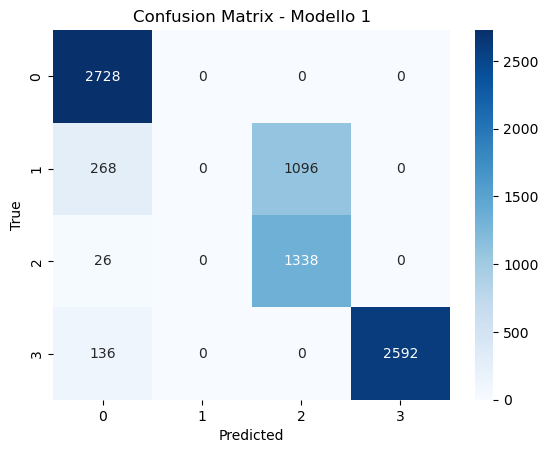

Classification Report 2 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=170,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2728
           1       0.00      0.00      0.00      1364
           2       0.55      0.98      0.70      

/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


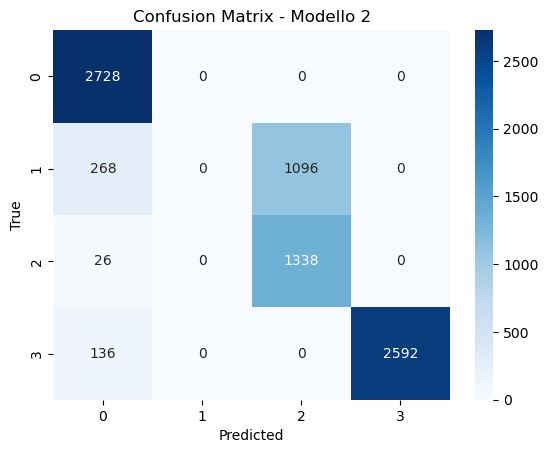

/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report 3 RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2728
           1       0.00      0.00      0.00      1364
           2       0.64      0.98      0.77      1364
           3       1.00      0.95      0.98      2728

    accuracy                           0.81      8184
   macro avg       0.60      0.73      0.66      8184
weighted avg       0.70      0.81      0.75      8184

Confusion Matrix 3
[[2728    0    0    0]
 [ 598    0  766    0]
 [  31    0 1333    0]
 [ 128    0    0 2600]]


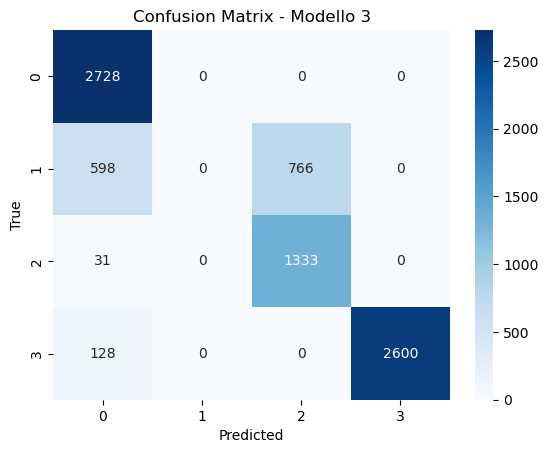

/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report 4 RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2728
           1       0.00      0.00      0.00      1364
           2       0.63      0.98      0.77      1364
           3       1.00      0.94      0.97      2728

    accuracy                           0.81      8184
   macro avg       0.60      0.73      0.65      8184
weighted avg       0.70      0.81      0.74      8184

Confusion Matrix 4
[[2728    0    0    0]
 [ 577    0  787    0]
 [  30    0 1334    0]
 [ 173    0    0 2555]]


/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


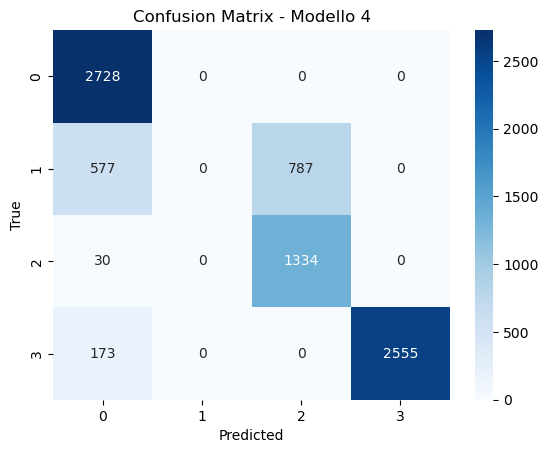

/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report 5 RandomForestClassifier(max_depth=10, min_samples_split=1, random_state=42)
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2728
           1       0.00      0.00      0.00      1364
           2       0.64      0.98      0.77      1364
           3       1.00      0.96      0.98      2728

    accuracy                           0.82      8184
   macro avg       0.61      0.73      0.66      8184
weighted avg       0.70      0.82      0.75      8184

Confusion Matrix 5
[[2728    0    0    0]
 [ 615    0  749    0]
 [  30    0 1334    0]
 [ 106    0    0 2622]]


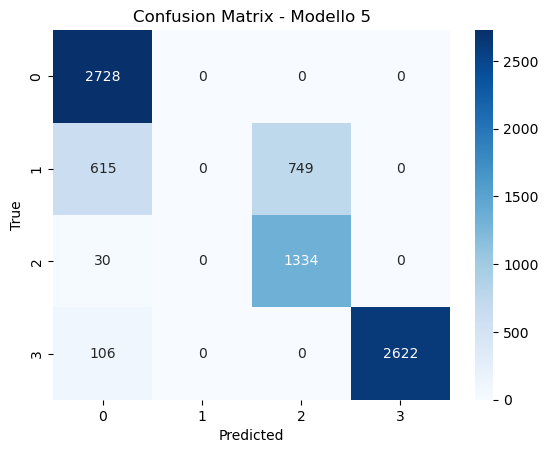

Classification Report 6 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=170,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2728
           1       0.00      0.00      0.00      1364
           2       0.54      0.98      0.70     

/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


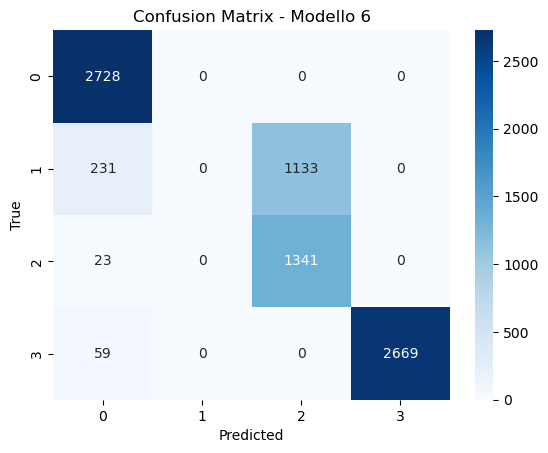

Classification Report 7 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=170,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2728
           1       0.00      0.00      0.00      1364
           2       0.54      0.98      0.70     

/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


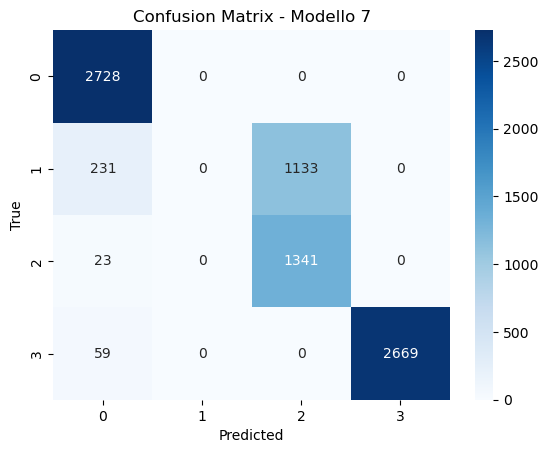

/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report 8 RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=150,
                       random_state=42)
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      2728
           1       0.40      0.98      0.57      1364
           2       0.00      0.00      0.00      1364
           3       0.00      0.00      0.00      2728

    accuracy                           0.50      8184
   macro avg       0.24      0.49      0.32      8184
weighted avg       0.25      0.50      0.33      8184

Confusion Matrix 8
[[2728    0    0    0]
 [  28 1336    0    0]
 [1293   71    0    0]
 [ 810 1918    0    0]]


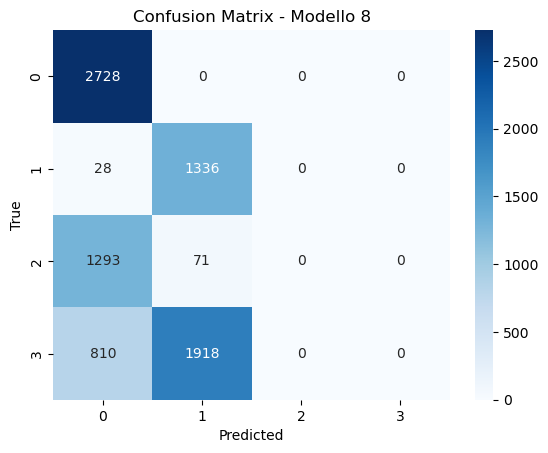

Classification Report 9 RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2728
           1       0.74      1.00      0.85      1364
           2       1.00      0.02      0.03      1364
           3       0.76      1.00      0.86      2728

    accuracy                           0.83      8184
   macro avg       0.87      0.75      0.69      8184
weighted avg       0.87      0.83      0.77      8184

Confusion Matrix 9
[[2728    0    0    0]
 [   0 1364    0    0]
 [   1  480   24  859]
 [  12    0    0 2716]]


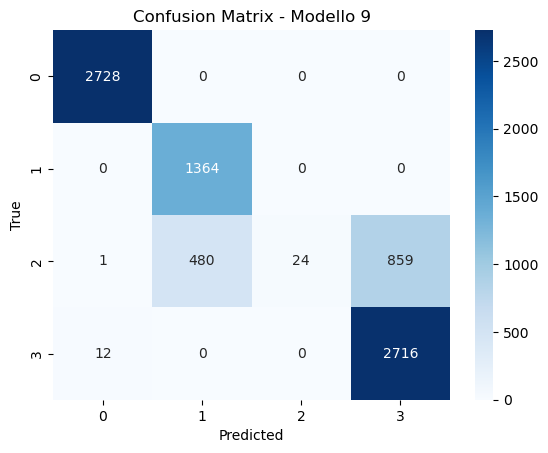

In [126]:
i=0
for model in multiclassifier:
    # Get the model prediction
    predictions = model.predict(X_Test)
    
    # Calculate and print classification report
    report_Test = classification_report(concatenated_DF_Test['Error'], predictions)
    i += 1
    print("Classification Report", i, model)
    print(report_Test)

   # Calculate and print the confusion matrix using seaborn
    confusion_mat = confusion_matrix(concatenated_DF_Test['Error'], predictions)
    print("Confusion Matrix", i)
    print(confusion_mat)

  # Display confusion matrix
    plt.figure()
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - model {i}')
    plt.show()

## Test: model Loops individuation


In [131]:

dimNomLoops = 1364    #Max = 2728
dimLoopsLoops = 1364   #Max = 1364
dimChainLoops = 130    #Max = 1364
dimTiesLoops = 130 #Max = 2727
concatenated_DF_Loops = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_Chain, dimChain, binned_Ties, dimTies)
concatenated_DF_Loops



,Micr1_mean_binned,Micr1_skew_binned,Micr1_var_binned,Acc1X_mean_binned,Acc1X_skew_binned,Acc1X_var_binned,Acc1Y_mean_binned,Acc1Y_skew_binned,Acc1Y_var_binned,Acc1Z_mean_binned,...,Mems5X_mean_binned,Mems5X_skew_binned,Mems5X_var_binned,Mems5Y_mean_binned,Mems5Y_skew_binned,Mems5Y_var_binned,Mems5Z_mean_binned,Mems5Z_skew_binned,Mems5Z_var_binned,Error
0,-0.004816,0.051653,4.143655,0.056115,-0.267702,0.719684,0.001682,0.450708,7.264728,0.009020,...,1.602516,0.070839,0.001780,1.653408,0.209117,0.001568,1.687857,0.680014,0.002475,0
1,0.057922,0.221297,3.347931,0.054229,-0.145160,1.087754,-0.019580,-0.138556,9.608789,0.022354,...,1.600227,0.104360,0.002110,1.653089,-0.114436,0.001484,1.685153,0.473613,0.002309,0
2,0.061762,-0.011147,3.545638,0.054216,0.201121,0.737336,0.048800,-0.420234,4.609882,0.014063,...,1.603398,0.242082,0.001713,1.656134,-0.279470,0.001528,1.694615,0.122532,0.002174,0
3,0.070155,-0.083714,4.332263,0.056790,-0.004932,0.700795,0.018749,-0.358628,8.233508,0.006768,...,1.597323,-0.274674,0.001587,1.649379,-0.084064,0.001402,1.680295,0.248782,0.002342,0
4,0.092257,-0.081737,3.935596,0.057864,-0.264635,0.832335,-0.013152,0.149603,6.612272,0.012578,...,1.602242,-0.207498,0.002128,1.653789,-0.051933,0.001448,1.688669,0.240088,0.002595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25591,-0.060053,-0.017446,3.056803,0.047084,-0.282958,0.722104,0.002561,-0.969441,3.889946,0.007342,...,1.600534,-0.212854,0.002193,1.651343,-0.204532,0.001042,1.687485,-0.091597,0.001236,3
25592,-0.015058,0.056528,3.328477,0.044304,0.289558,0.669349,-0.010443,-1.958226,7.356148,0.018275,...,1.602233,-0.257366,0.001779,1.654017,0.220229,0.001074,1.687938,0.408077,0.001065,3
25593,0.005723,-0.005172,3.964571,0.046783,-0.067728,0.783667,-0.002189,-0.049808,5.107653,0.007803,...,1.602998,-0.092522,0.001834,1.654407,0.313285,0.000847,1.690804,0.674446,0.001098,3
25594,0.066201,-0.197631,3.234050,0.045575,-0.470086,0.653014,0.047956,0.154719,9.501845,0.006257,...,1.601290,0.139056,0.001771,1.653843,0.081407,0.000908,1.687418,0.021315,0.001188,3


In [132]:
#Separate the target variable (Error) from the other features of the dataframe
X = concatenated_DF_Loops.drop('Error', axis=1)
y = concatenated_DF_Loops['Error']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =1984)

In [133]:
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1_score': make_scorer(f1_score, average='macro', zero_division=0)
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model = RandomForestClassifier(random_state=42)

#f1_score
param_grid_rf = {
    'n_estimators': [30, 50, 100, 200],  
    'max_depth': [2, 3, 5, 10, 20, 40],  
    'min_samples_split': [2, 4],  
    'min_samples_leaf': [1, 2],  
}

start_time = time.time()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring=scorers, refit='f1_score', verbose=2)
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
dump(best_model, 'Best_multiclissifier_rf1F1_Loops.joblib')

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
The model took  8.832 minutes to train.
Migliori parametri: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Migliore score: 0.8238312111397518
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4066
           1       0.73      0.49      0.59      1204
           2       0.98      0.99      0.99      1245
           3       0.77      0.96      0.86      1164

    accuracy                           0.84      7679
   macro avg       0.83      0.83      0.82      7679
weighted avg       0.83      0.84      0.83      7679



Classification Report
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2728
           1       0.00      0.00      0.00      1364
           2       0.64      0.98      0.77      1364
           3       1.00      0.95      0.98      2728

    accuracy                           0.81      8184
   macro avg       0.60      0.73      0.66      8184
weighted avg       0.70      0.81      0.75      8184

Confusion Matrix
[[2728    0    0    0]
 [ 598    0  766    0]
 [  31    0 1333    0]
 [ 128    0    0 2600]]


/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/albertotrenta/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


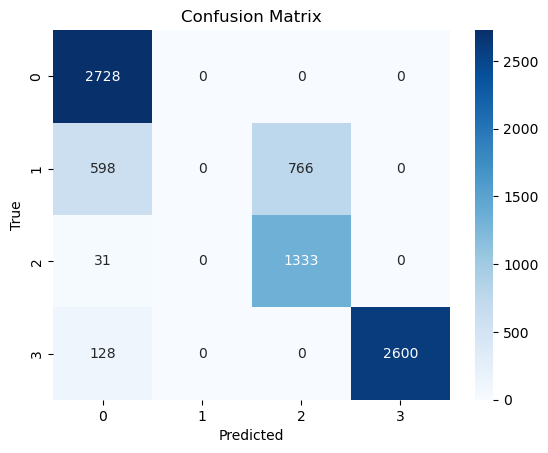

[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   1.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   1.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   5.1s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.7s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   5.4s
[CV] 

[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.8s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   2.5s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.8s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.8s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.6s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   2.8s
[CV] E

[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   2.5s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   5.3s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.7s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   2.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.1s
[CV]

[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.8s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   2.5s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.8s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=30; total time=   0.8s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.7s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   5.4s
[CV] 

[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   5.1s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.8s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.9s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   1.5s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   2.8s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   5.4s
[CV]

[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=30; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=50; total time=   1.2s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   2.5s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   5.2s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.6s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   2.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   1.1s
[CV] 

[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.7s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   5.2s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=30; total time=   0.8s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   1.5s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50; total time=   1.3s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   2.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   1.1s
[CV] 

In [134]:
# Remove target column (Error) from features
X_Test = concatenated_DF_Test.drop('Error', axis=1)

model = load('Best_multiclissifier_rf1F1_Loops.joblib')
# Get the model prediction
predictions = model.predict(X_Test)

# Calculate and print classification report
report_Test = classification_report(concatenated_DF_Test['Error'], predictions)

print("Classification Report")
print(report_Test)

# Calculate and print the confusion matrix using seaborn
confusion_mat = confusion_matrix(concatenated_DF_Test['Error'], predictions)
print("Confusion Matrix")
print(confusion_mat)

# Display confusion matrix
plt.figure()
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix')
plt.show()

In [20]:
#For the multiclassifier I use addMultiError, assigning 0 = Nominal, 1,2,3 the three error types

df_Nominal = df_from_path(file_paths_nom)
binned_nom = toBinned(df_Nominal)
binned_nom = addMultiError(binned_nom, type = 0)

df_Loops = df_from_path(file_paths_Loops)
binned_Loops = toBinned(df_Loops)
binned_Loops = addMultiError(binned_Loops, type = 1)

df_Chain = df_from_path(file_paths_Chain)
binned_Chain = toBinned(df_Chain)
binned_Chain = addMultiError(binned_Chain, type = 2)

df_Ties = df_from_path(file_paths_Ties)
binned_Ties = toBinned(df_Ties)
binned_Ties = addMultiError(binned_Ties,type = 3)

# I create the dataframe on which I am going to train the multiclassifiers
dimNom = 13596      #Max = 13596
dimLoops = 99999     #Max = 10079
dimChain = 99999    #Max = 5455
dimTies = 99999  #Max = 20455
concatenated_DF_un = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_Chain, dimChain, binned_Ties, dimTies)

In [21]:
#Separate the target variable (Error) from the other features of the dataframe
X = concatenated_DF_un.drop('Error', axis=1)
y = concatenated_DF_un['Error']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =1984)

In [22]:
concatenated_DF_un

,Micr1_mean_binned,Micr1_skew_binned,Micr1_var_binned,Acc1X_mean_binned,Acc1X_skew_binned,Acc1X_var_binned,Acc1Y_mean_binned,Acc1Y_skew_binned,Acc1Y_var_binned,Acc1Z_mean_binned,...,Mems5X_mean_binned,Mems5X_skew_binned,Mems5X_var_binned,Mems5Y_mean_binned,Mems5Y_skew_binned,Mems5Y_var_binned,Mems5Z_mean_binned,Mems5Z_skew_binned,Mems5Z_var_binned,Error
0,-0.004816,0.051653,4.143655,0.056115,-0.267702,0.719684,0.001682,0.450708,7.264728,0.009020,...,1.602516,0.070839,0.001780,1.653408,0.209117,0.001568,1.687857,0.680014,0.002475,0
1,0.057922,0.221297,3.347931,0.054229,-0.145160,1.087754,-0.019580,-0.138556,9.608789,0.022354,...,1.600227,0.104360,0.002110,1.653089,-0.114436,0.001484,1.685153,0.473613,0.002309,0
2,0.061762,-0.011147,3.545638,0.054216,0.201121,0.737336,0.048800,-0.420234,4.609882,0.014063,...,1.603398,0.242082,0.001713,1.656134,-0.279470,0.001528,1.694615,0.122532,0.002174,0
3,0.070155,-0.083714,4.332263,0.056790,-0.004932,0.700795,0.018749,-0.358628,8.233508,0.006768,...,1.597323,-0.274674,0.001587,1.649379,-0.084064,0.001402,1.680295,0.248782,0.002342,0
4,0.092257,-0.081737,3.935596,0.057864,-0.264635,0.832335,-0.013152,0.149603,6.612272,0.012578,...,1.602242,-0.207498,0.002128,1.653789,-0.051933,0.001448,1.688669,0.240088,0.002595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49580,-0.120196,-0.013659,3.546483,0.045707,-0.892035,0.846870,0.011761,-0.790011,4.553095,0.018357,...,1.601506,-0.140025,0.001507,1.653998,0.265479,0.000780,1.688502,0.676706,0.000390,3
49581,-0.204270,-0.078290,3.663386,0.047415,0.006660,0.721450,-0.015649,0.347861,7.223919,0.016105,...,1.600857,-0.073355,0.002287,1.654328,0.222200,0.000847,1.688481,-0.084744,0.000463,3
49582,0.097258,-0.005709,3.475474,0.046167,0.080302,0.838228,-0.013593,-1.292963,11.854933,0.010976,...,1.600876,0.110467,0.002068,1.653207,0.173113,0.000609,1.687209,-0.440460,0.000406,3
49583,0.205695,0.134289,3.781502,0.045732,-0.158313,0.606287,-0.011448,0.091116,5.726041,0.015507,...,1.600891,-0.269945,0.001712,1.654279,0.200055,0.000763,1.689279,0.157232,0.000431,3


In [23]:
concatenated_DF

,Micr1_mean_binned,Micr1_skew_binned,Micr1_var_binned,Acc1X_mean_binned,Acc1X_skew_binned,Acc1X_var_binned,Acc1Y_mean_binned,Acc1Y_skew_binned,Acc1Y_var_binned,Acc1Z_mean_binned,...,Mems5X_mean_binned,Mems5X_skew_binned,Mems5X_var_binned,Mems5Y_mean_binned,Mems5Y_skew_binned,Mems5Y_var_binned,Mems5Z_mean_binned,Mems5Z_skew_binned,Mems5Z_var_binned,Error
0,-0.004816,0.051653,4.143655,0.056115,-0.267702,0.719684,0.001682,0.450708,7.264728,0.009020,...,1.602516,0.070839,0.001780,1.653408,0.209117,0.001568,1.687857,0.680014,0.002475,0
1,0.057922,0.221297,3.347931,0.054229,-0.145160,1.087754,-0.019580,-0.138556,9.608789,0.022354,...,1.600227,0.104360,0.002110,1.653089,-0.114436,0.001484,1.685153,0.473613,0.002309,0
2,0.061762,-0.011147,3.545638,0.054216,0.201121,0.737336,0.048800,-0.420234,4.609882,0.014063,...,1.603398,0.242082,0.001713,1.656134,-0.279470,0.001528,1.694615,0.122532,0.002174,0
3,0.070155,-0.083714,4.332263,0.056790,-0.004932,0.700795,0.018749,-0.358628,8.233508,0.006768,...,1.597323,-0.274674,0.001587,1.649379,-0.084064,0.001402,1.680295,0.248782,0.002342,0
4,0.092257,-0.081737,3.935596,0.057864,-0.264635,0.832335,-0.013152,0.149603,6.612272,0.012578,...,1.602242,-0.207498,0.002128,1.653789,-0.051933,0.001448,1.688669,0.240088,0.002595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49580,-0.120196,-0.013659,3.546483,0.045707,-0.892035,0.846870,0.011761,-0.790011,4.553095,0.018357,...,1.601506,-0.140025,0.001507,1.653998,0.265479,0.000780,1.688502,0.676706,0.000390,3
49581,-0.204270,-0.078290,3.663386,0.047415,0.006660,0.721450,-0.015649,0.347861,7.223919,0.016105,...,1.600857,-0.073355,0.002287,1.654328,0.222200,0.000847,1.688481,-0.084744,0.000463,3
49582,0.097258,-0.005709,3.475474,0.046167,0.080302,0.838228,-0.013593,-1.292963,11.854933,0.010976,...,1.600876,0.110467,0.002068,1.653207,0.173113,0.000609,1.687209,-0.440460,0.000406,3
49583,0.205695,0.134289,3.781502,0.045732,-0.158313,0.606287,-0.011448,0.091116,5.726041,0.015507,...,1.600891,-0.269945,0.001712,1.654279,0.200055,0.000763,1.689279,0.157232,0.000431,3


In [27]:
param_grid_xgb2 = {

'n_estimators': [30, 60, 80, 90],
'learning_rate': [0.01, 0.05, 0.1],
'max_depth': [1,2,3],
'min_child_weight': [1,2,3],
'colsample_bytree': [0.8, 1.0],
}

start_time = time.time()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb2, cv=5, n_jobs=-1, scoring=scorers, refit='accuracy', verbose=2)
grid_search.fit(X_train, y_train)


end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Model Save
dump(best_model, 'Best_multiclass_xgb2A.joblib')

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=30; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=80; total time=   3.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=30; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=30; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=80; total time=   3.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=90; total time=   3.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=80; total time=   3.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=60; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=90; total time=   3.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=30; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=60; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=90; total time=   3.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=30; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=80; total time=   3.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=30; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=60; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=80; total time=   3.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=30; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=60; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=80; total time=   3.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=30; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=60; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=90; total time=   3.8s
[CV] END colsample_bytree=0.8, learning_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=30; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=60; total time=   2.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=90; total time=   3.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=60; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=90; total time=   3.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=60; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=80; total time=   3.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=30; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=30; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=80; total time=   3.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=90; total time=   3.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=80; total time=   3.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=30; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=30; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=60; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=90; total time=   3.8s
[CV] END colsample_bytree=0.8, learning_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=30; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=60; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=90; total time=   3.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=60; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=90; total time=   3.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=60; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=80; total time=   3.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=30; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=60; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=80; total time=   3.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=30; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=60; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=80; total time=   3.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=30; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=60; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=90; total time=   3.8s
[CV] END colsample_bytree=0.8, learning_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=30; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=80; total time=   3.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=90; total time=   3.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=80; total time=   3.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=90; total time=   3.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=80; total time=   3.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=90; total time=   3.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=80; total time=   4.3s
[CV] END colsample_bytree=0.8, learning_

The model took  4.876 minutes to train.
Migliori parametri: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 90}
Migliore score: 0.8632341797106127
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      4044
           1       0.72      0.75      0.73      3043
           2       0.98      1.00      0.99      1644
           3       0.91      0.99      0.95      6145

    accuracy                           0.86     14876
   macro avg       0.86      0.86      0.86     14876
weighted avg       0.86      0.86      0.86     14876



In [29]:
start_time = time.time()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb2, cv=5, n_jobs=-1, scoring=scorers, refit='f1_score', verbose=2)
grid_search.fit(X_train, y_train)


end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

# Model Save
dump(best_model, 'Best_multiclass_xgb2f1.joblib')

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=30; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=80; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=90; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=80; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=90; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=80; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=90; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=60; total time=   2.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=90; total time=   3.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=60; total time=   2.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=80; total time=   3.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=60; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=90; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=30; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=60; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=80; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=30; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=60; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=90; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=60; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=80; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=30; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=60; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=60; total time=   2.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=90; total time=   3.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=30; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=80; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=30; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=30; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=80; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=90; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_ra

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=80; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=30; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=60; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=90; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=60; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=80; total time=   2.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=30; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=60; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=90; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=60; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=80; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=30; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=60; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=80; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=30; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=80; total time=   1.9s
[CV] END colsample_bytree=0.8, learning_r

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=80; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=30; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=30; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=60; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=90; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=60; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=80; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=30; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=90; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=80; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=90; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=80; total time=   2.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=90; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=80; total time=   3.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=90; total time=   3.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=80; total time=   3.2s
[CV] END colsample_bytree=0.8, learning_

The model took  5.212 minutes to train.
Migliori parametri: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 90}
Migliore score: 0.8601125752469734
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      4044
           1       0.72      0.75      0.73      3043
           2       0.98      1.00      0.99      1644
           3       0.91      0.99      0.95      6145

    accuracy                           0.86     14876
   macro avg       0.86      0.86      0.86     14876
weighted avg       0.86      0.86      0.86     14876



In [30]:
param_grid_rf2 = {
    'n_estimators': [30, 50, 100],  
    'max_depth': [2, 3, 5, 10],  
    'min_samples_split': [1,2,3],  
    'min_samples_leaf': [1, 2,3],  
}

start_time = time.time()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf2, cv=5, n_jobs=-1, scoring=scorers, refit='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
dump(best_model, 'Best_multiclass_rfA2.joblib')


y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
The model took  8.230 minutes to train.
Migliori parametri: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 100}
Migliore score: 0.8552823939654189
              precision    recall  f1-score   support

           0       0.89      0.65      0.75      4044
           1       0.69      0.75      0.72      3043
           2       0.97      1.00      0.98      1644
           3       0.88      1.00      0.94      6145

    accuracy                           0.85     14876
   macro avg       0.86      0.85      0.85     14876
weighted avg       0.86      0.85      0.85     14876



In [31]:
param_grid_rf2 = {
    'n_estimators': [30, 50, 100],  
    'max_depth': [2, 3, 5, 10],  
    'min_samples_split': [1,2,3],  
    'min_samples_leaf': [1, 2,3],  
}

start_time = time.time()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rf2, cv=5, n_jobs=-1, scoring=scorers, refit='f1_score', verbose=2)
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

print("Best Parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
dump(best_model, 'Best_multiclass_rf2f1.joblib')


y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=80; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=30; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=60; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=80; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=30; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=60; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=90; total time=   2.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=80; total time=   3.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=30; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=60; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=90; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=60; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=90; total time=   2.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=30; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=80; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_r

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=30; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=60; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=1, n_estimators=90; total time=   2.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=60; total time=   1.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=90; total time=   2.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=60; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=80; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=30; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=2, n_estimators=90; total time=   2.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=60; total time=   1.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=90; total time=   2.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=30; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=80; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=30; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=30; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=80; total time=   2.6s
[CV] END colsample_bytree=0.8, learning_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=30; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=30; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=80; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=90; total time=   2.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=60; total time=   2.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=90; total time=   2.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=60; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=80; total time=   2.6s
[CV] END colsample_bytree=0.8, learning_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=60; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=80; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=30; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=60; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=90; total time=   3.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=60; total time=   2.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=80; total time=   3.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=30; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=1, min_child_weight=3, n_estimators=80; total time=   2.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=30; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=30; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=80; total time=   2.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=90; total time=   2.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=80; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=2, n_estimators=90; total time=   3.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=80; total time=   2.7s
[CV] END colsample_bytree=0.8, learning_

The model took  9.709 minutes to train.
Migliori parametri: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 100}
Migliore score: 0.8509775421155015
              precision    recall  f1-score   support

           0       0.89      0.65      0.75      4044
           1       0.69      0.75      0.72      3043
           2       0.97      1.00      0.98      1644
           3       0.88      1.00      0.94      6145

    accuracy                           0.85     14876
   macro avg       0.86      0.85      0.85     14876
weighted avg       0.86      0.85      0.85     14876



In [7]:


multiclass1 = load('Best_multiclass_xgbA1_bal50.joblib')
m1 = 'XGB 1 Accuracy, 50% '
multiclass2 = load('Best_multiclass_xgbf1_bal50.joblib')
m2 = 'XGB 1 F1 score, 50% '
multiclass3 = load('Best_multiclissifier_rf1F1_balanced.joblib')
m3 = 'RF 1 F1 score, 50%'
multiclass4 = load('Best_multiclassifier_rfA1_balanced.joblib')
m4 = 'RF 1 Accuracy, 50%'
multiclass5 = load('Best_multiclass_rf2f1_bal50.joblib')
m5 = 'RF 2 F1 score, 50%'

multiclass1_unb = load('Best_multiclass_xgbA1.joblib')
m6 = 'XGB 1 Accuracy'
multiclass2_unb = load('Best_multiclass_xgb2A.joblib')
m7 = 'XGB 2 Accuracy'
multiclass3_unb = load('Best_multiclass_xgb1f1.joblib')
m8 = 'XGB 1 F1'
multiclass4_unb = load('Best_multiclass_xgb2f1.joblib')
m9 = 'XGB 2 F1'


multiclassifier_bal = [ multiclass1, 
                        multiclass2,
                        multiclass3,
                        multiclass4,
                        multiclass5,
                        ]

multiclassifier_unb = [multiclass1_unb, 
                        multiclass2_unb,
                        multiclass3_unb, 
                        multiclass4_unb
                          ]

names_multicl_bal = [m1,m2,m3,m4,m5]
names_multicl_unb = [m6,m7,m8,m9]

In [8]:

dimNom = 99999      #Max = 13596
dimLoops = 99999     #Max = 10079
dimChain = 99999    #Max = 5455
dimTies = 99999  #Max = 20455
concatenated_DF_unb = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_Chain, dimChain, binned_Ties, dimTies)


In [9]:
X_bal = concatenated_DF.drop('Error', axis=1)
X_unbal = concatenated_DF_unb.drop('Error', axis=1)

Classification Report 1
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     13596
           1       0.80      0.89      0.84      4000
           2       0.99      1.00      1.00      4000
           3       0.85      0.98      0.91      4000

    accuracy                           0.91     25596
   macro avg       0.90      0.94      0.92     25596
weighted avg       0.92      0.91      0.92     25596

Confusion Matrix 0
[[11954   908    24   710]
 [  432  3568     0     0]
 [    7     0  3993     0]
 [   95     0     0  3905]]


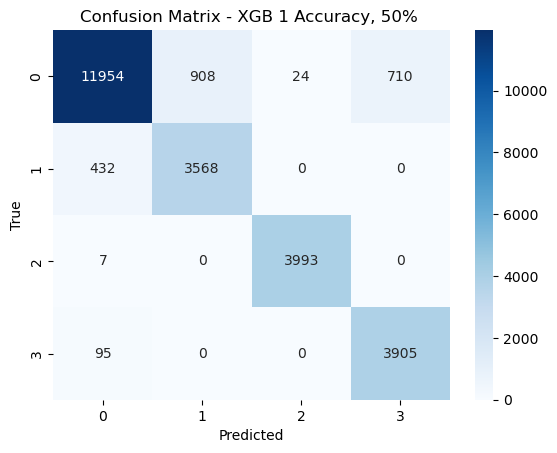

Classification Report 2
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     13596
           1       0.80      0.89      0.84      4000
           2       0.99      1.00      1.00      4000
           3       0.85      0.98      0.91      4000

    accuracy                           0.91     25596
   macro avg       0.90      0.94      0.92     25596
weighted avg       0.92      0.91      0.92     25596

Confusion Matrix 1
[[11954   908    24   710]
 [  432  3568     0     0]
 [    7     0  3993     0]
 [   95     0     0  3905]]


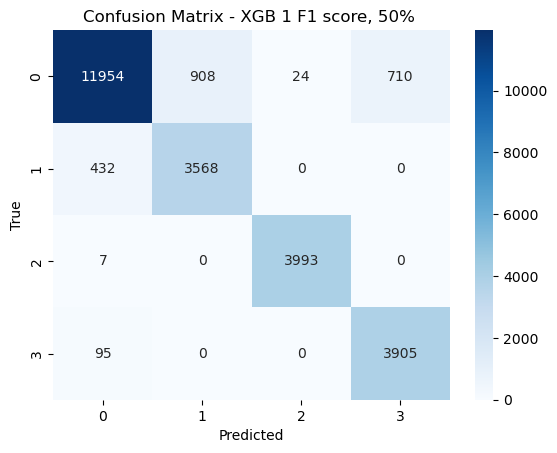

Classification Report 3
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     13596
           1       0.94      0.85      0.89      4000
           2       0.99      1.00      1.00      4000
           3       0.92      0.99      0.95      4000

    accuracy                           0.95     25596
   macro avg       0.95      0.95      0.95     25596
weighted avg       0.95      0.95      0.95     25596

Confusion Matrix 2
[[13016   221    22   337]
 [  612  3388     0     0]
 [   12     0  3988     0]
 [   48     0     0  3952]]


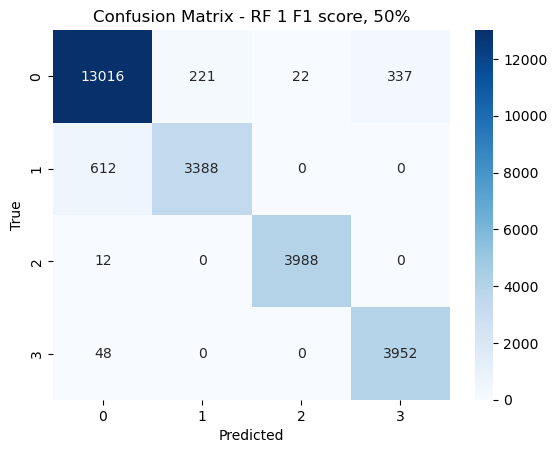

Classification Report 4
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     13596
           1       0.83      0.85      0.84      4000
           2       0.98      1.00      0.99      4000
           3       0.79      0.99      0.88      4000

    accuracy                           0.90     25596
   macro avg       0.89      0.93      0.90     25596
weighted avg       0.91      0.90      0.91     25596

Confusion Matrix 3
[[11805   707    61  1023]
 [  586  3414     0     0]
 [   11     0  3989     0]
 [   50     0     0  3950]]


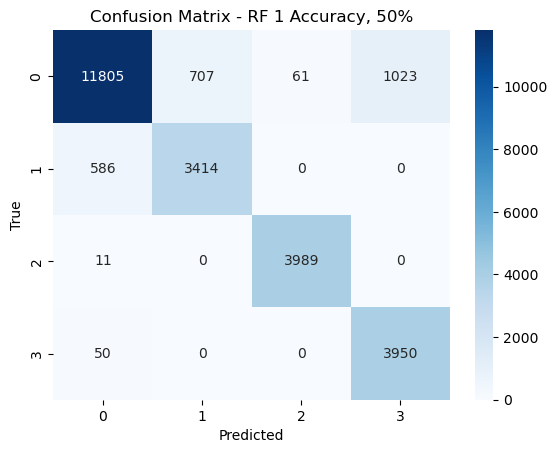

Classification Report 5
              precision    recall  f1-score   support

           0       0.86      0.87      0.86     13596
           1       0.80      0.52      0.63      4000
           2       0.98      1.00      0.99      4000
           3       0.77      0.99      0.87      4000

    accuracy                           0.85     25596
   macro avg       0.85      0.84      0.84     25596
weighted avg       0.85      0.85      0.85     25596

Confusion Matrix 4
[[11822   518    95  1161]
 [ 1935  2065     0     0]
 [   14     0  3986     0]
 [   45     0     0  3955]]


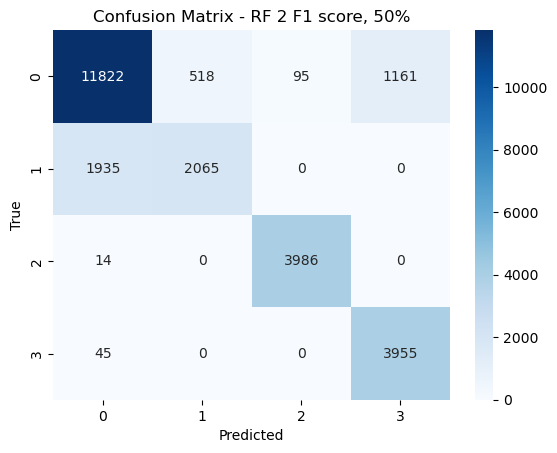

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

i = 0
for model in multiclassifier_bal:
    # Get the model prediction
    predictions = model.predict(X_bal)
    
    # Calculate and print classification report
    report = classification_report(concatenated_DF['Error'], predictions)
    print("Classification Report", i+1)
    print(report)

   # Calculate and print the confusion matrix using seaborn
    confusion_mat = confusion_matrix(concatenated_DF['Error'], predictions)
    print("Confusion Matrix", i)
    print(confusion_mat)

  # Display confusion matrix
    plt.figure()
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {names_multicl_bal[i]}')
    plt.show()
    i += 1


Classification Report 1
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     13596
           1       0.94      0.94      0.94     10079
           2       1.00      1.00      1.00      5455
           3       0.98      1.00      0.99     20455

    accuracy                           0.97     49585
   macro avg       0.97      0.97      0.97     49585
weighted avg       0.97      0.97      0.97     49585

Confusion Matrix 0
[[12716   549    10   321]
 [  431  9479     2   167]
 [    2     1  5452     0]
 [   22    39     0 20394]]


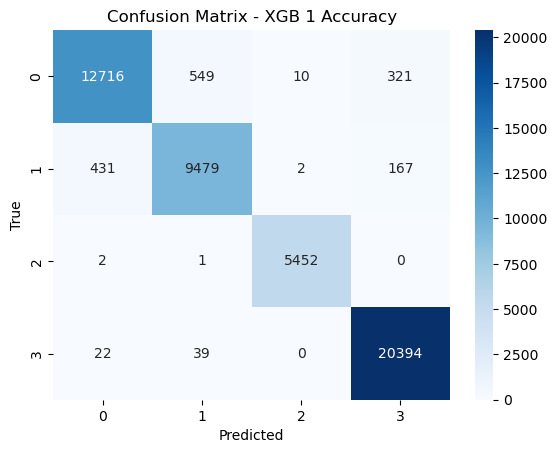

Classification Report 2
              precision    recall  f1-score   support

           0       0.86      0.70      0.77     13596
           1       0.74      0.77      0.76     10079
           2       0.98      1.00      0.99      5455
           3       0.91      0.99      0.95     20455

    accuracy                           0.87     49585
   macro avg       0.87      0.87      0.87     49585
weighted avg       0.87      0.87      0.87     49585

Confusion Matrix 1
[[ 9537  2673    69  1317]
 [ 1516  7803    34   726]
 [   21     4  5430     0]
 [   39    96     0 20320]]


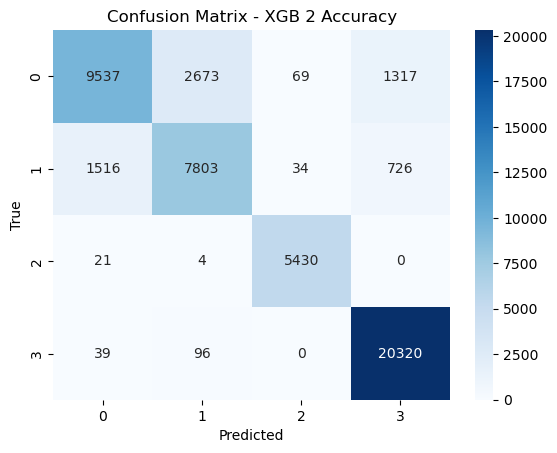

Classification Report 3
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     13596
           1       0.94      0.94      0.94     10079
           2       1.00      1.00      1.00      5455
           3       0.98      1.00      0.99     20455

    accuracy                           0.97     49585
   macro avg       0.97      0.97      0.97     49585
weighted avg       0.97      0.97      0.97     49585

Confusion Matrix 2
[[12716   549    10   321]
 [  431  9479     2   167]
 [    2     1  5452     0]
 [   22    39     0 20394]]


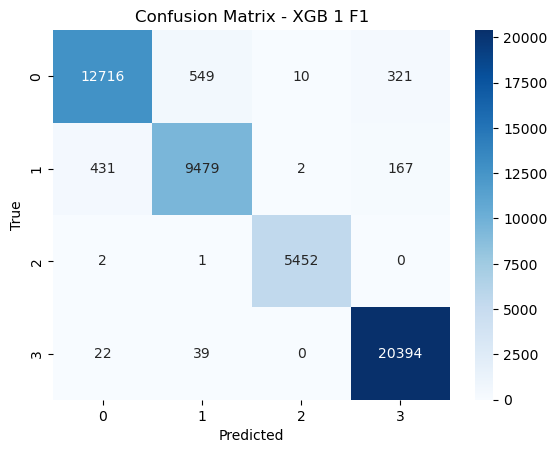

Classification Report 4
              precision    recall  f1-score   support

           0       0.86      0.70      0.77     13596
           1       0.74      0.77      0.76     10079
           2       0.98      1.00      0.99      5455
           3       0.91      0.99      0.95     20455

    accuracy                           0.87     49585
   macro avg       0.87      0.87      0.87     49585
weighted avg       0.87      0.87      0.87     49585

Confusion Matrix 3
[[ 9537  2673    69  1317]
 [ 1516  7803    34   726]
 [   21     4  5430     0]
 [   39    96     0 20320]]


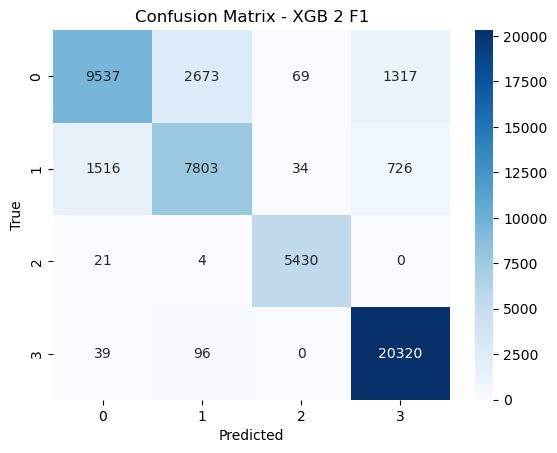

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

i = 0
for model in multiclassifier_unb:
    # Get the model prediction
    predictions = model.predict(X_unbal)
    
    # Calculate and print classification report
    report = classification_report(concatenated_DF_unb['Error'], predictions)
  
    print("Classification Report", i+1)
    print(report)

   # Calculate and print the confusion matrix using seaborn
    confusion_mat = confusion_matrix(concatenated_DF_unb['Error'], predictions)
    print("Confusion Matrix", i)
    print(confusion_mat)

  # Display confusion matrix
    plt.figure()
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {names_multicl_unb[i]}')
    plt.show()
    i += 1